# Bayesian Network Construction

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BIC, PC

## Exercise 3.1

Draw a causal graph for each of the following problems:
1.	The province of origin and the profession are two of the risk factors for brucellosis. One of the symptoms of this disease is fever. The two most common tests to diagnose this disease are blood cultures and serology.


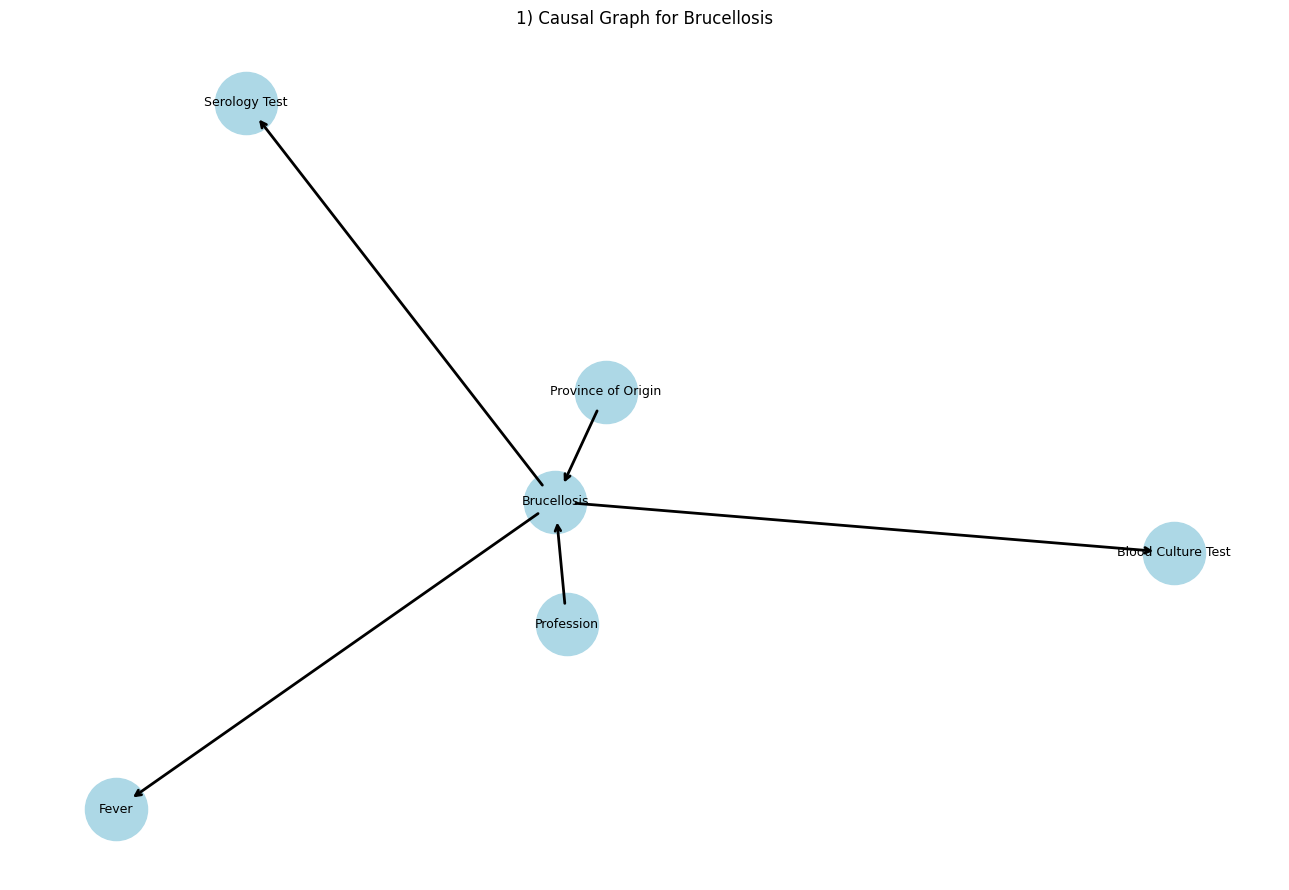

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ["Province of Origin", "Profession", "Brucellosis", "Fever", "Blood Culture Test", "Serology Test"]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Province of Origin", "Brucellosis"),
    ("Profession", "Brucellosis"),
    ("Brucellosis", "Fever"),
    ("Brucellosis", "Blood Culture Test"),
    ("Brucellosis", "Serology Test")
]
G.add_edges_from(edges)

# Set up plot
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9)

# Draw arrows with annotations to shrink arrow heads away from nodes
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=15, shrinkB=15),
    )

plt.title("1) Causal Graph for Brucellosis")
plt.margins(0.1)
plt.axis('off')
plt.tight_layout()
plt.show()


2.	Gout is a disease that mainly affects adult males. Almost all people with it have a history of hyperuricemia, but only 5% of patients with hyperuricemia develop gout. The first manifestation of acute gout is extraordinarily painful arthritis. Half of the uric acid stones found are also due to this disease.

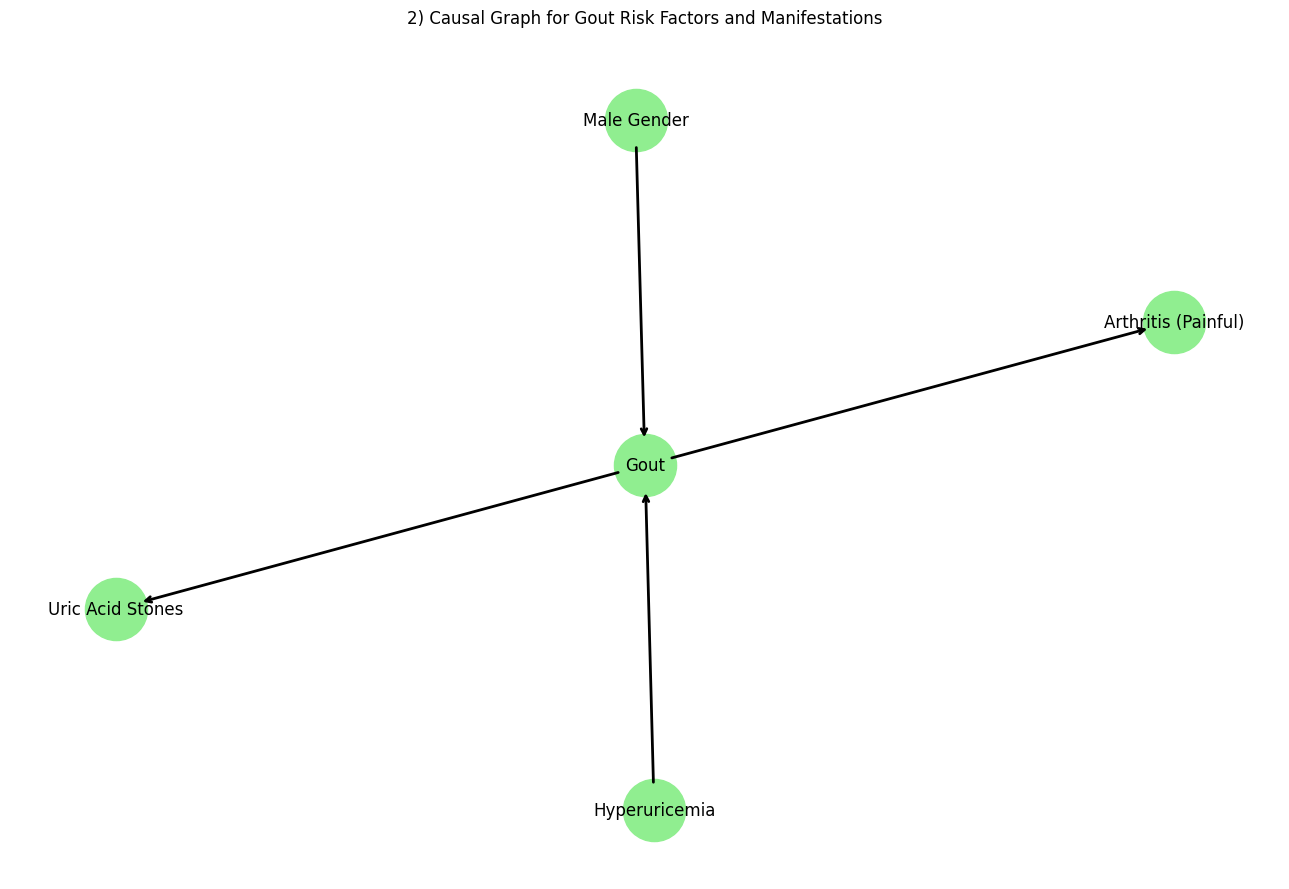

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Male Gender",
    "Hyperuricemia",
    "Gout",
    "Arthritis (Painful)",
    "Uric Acid Stones"
]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Male Gender", "Gout"),
    ("Hyperuricemia", "Gout"),
    ("Gout", "Arthritis (Painful)"),
    ("Gout", "Uric Acid Stones")
]
G.add_edges_from(edges)

# Plot setup with larger figure and margins
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=24)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightgreen")
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=20, shrinkB=20),
    )

# Adjust margins to ensure visibility
plt.margins(0.1)
plt.title("2) Causal Graph for Gout Risk Factors and Manifestations", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


3. Metastatic cancer can cause serum-calcium elevation and is, in turn, one of the possible causes of brain tumor. Both elevated serum calcium and brain tumor can produce coma. The brain tumor can also produce severe headaches.

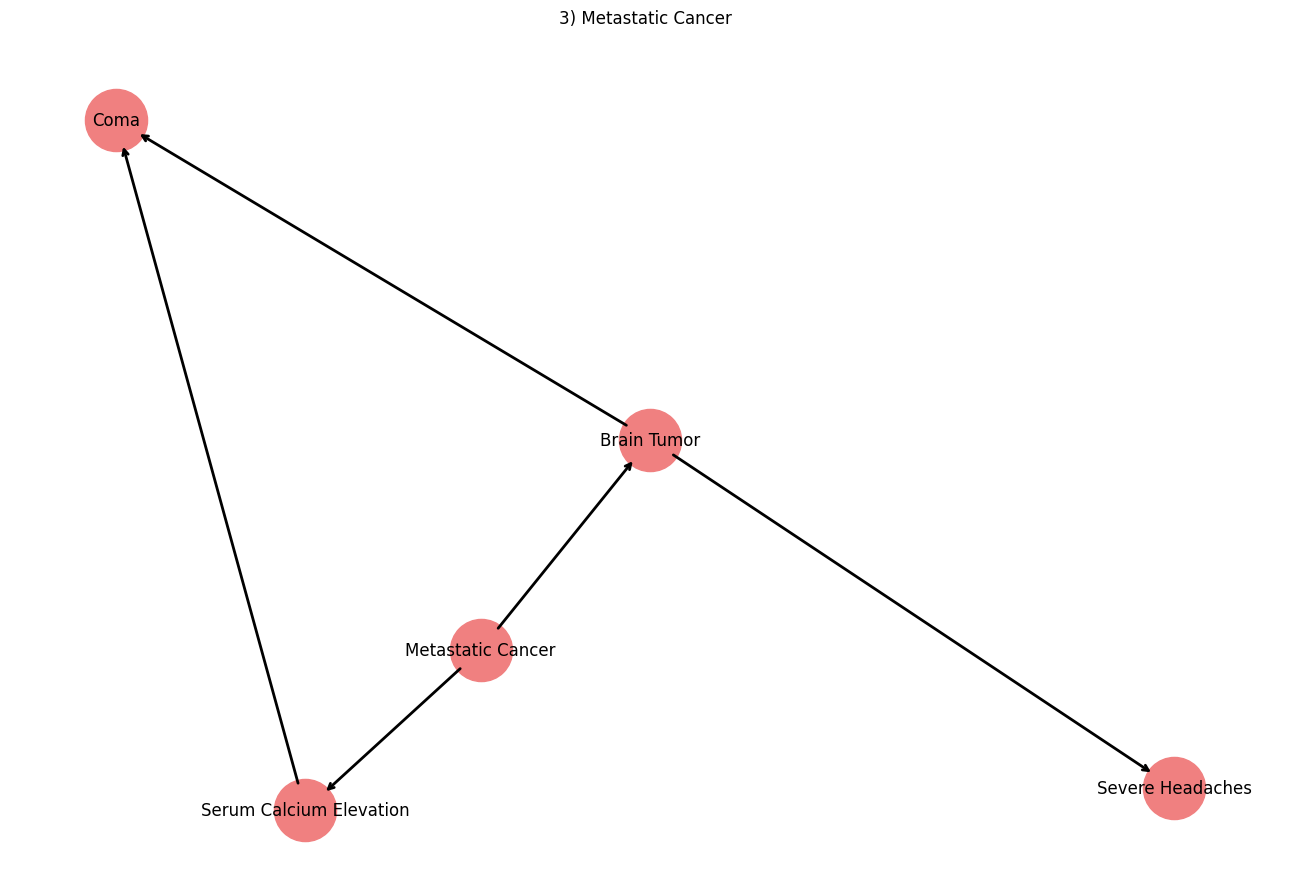

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Metastatic Cancer",
    "Serum Calcium Elevation",
    "Brain Tumor",
    "Coma",
    "Severe Headaches"
]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Metastatic Cancer", "Serum Calcium Elevation"),
    ("Metastatic Cancer", "Brain Tumor"),
    ("Serum Calcium Elevation", "Coma"),
    ("Brain Tumor", "Coma"),
    ("Brain Tumor", "Severe Headaches")
]
G.add_edges_from(edges)

# Plot setup with larger figure and margins
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightcoral")
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=20, shrinkB=20),
    )

# Adjust margins to ensure visibility
plt.margins(0.1)
plt.title("3) Metastatic Cancer", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


4. A patient's dyspnea may be due to, among other causes, tuberculosis, lung cancer, or bronchitis. The fact that the patient has recently been to Asia increases the likelihood that he or she will suffer from tuberculosis, and the fact that he or she is a smoker is a risk factor for both lung cancer and bronchitis. A positive X-ray result indicates the presence of tuberculosis or lung cancer.

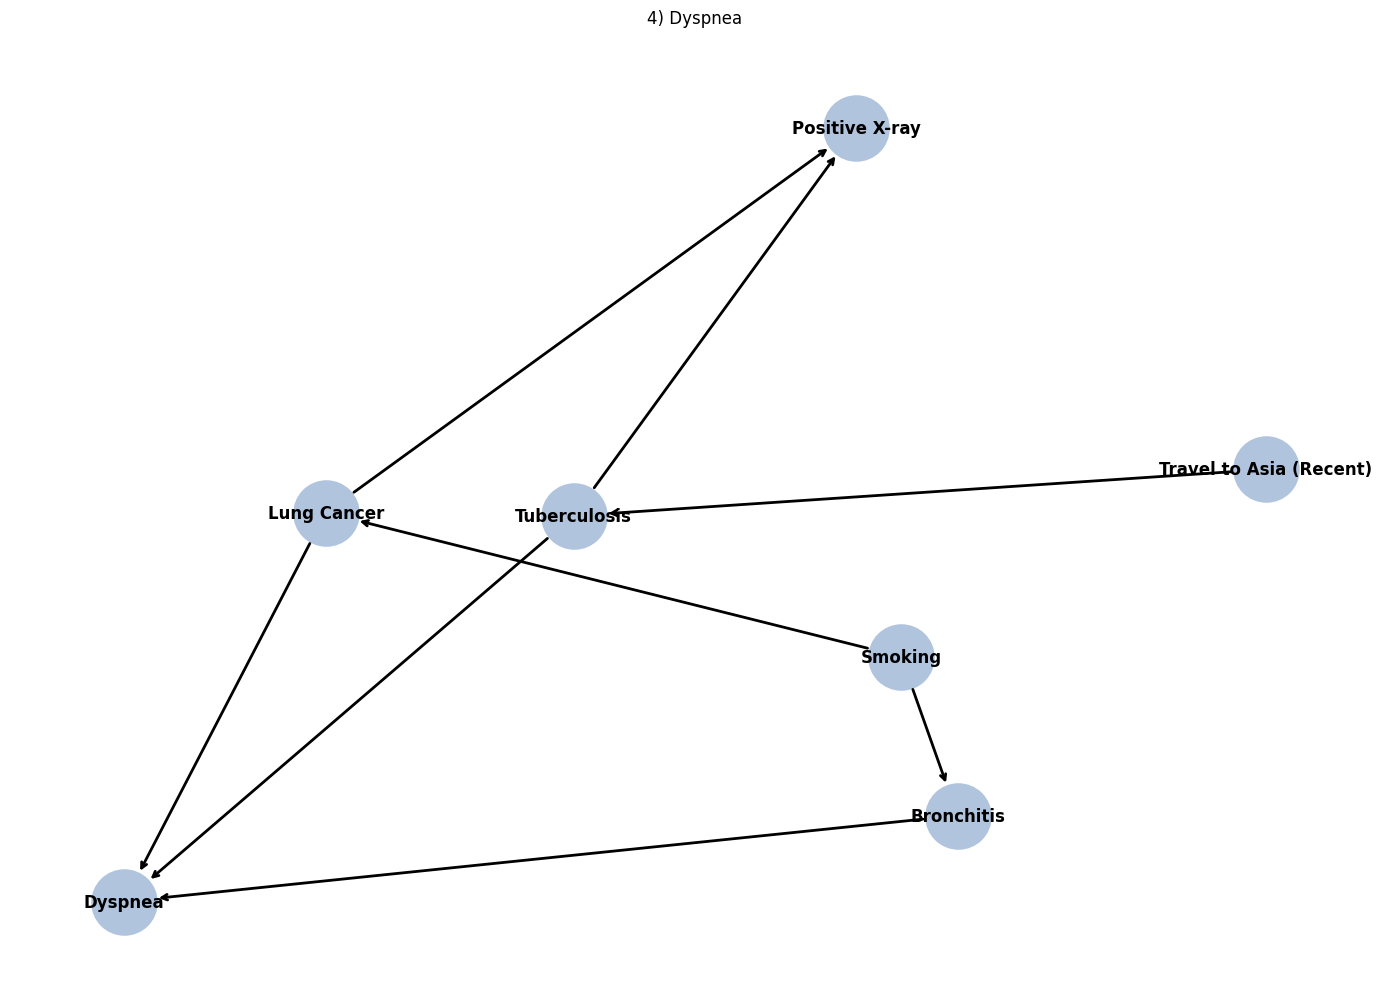

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Travel to Asia (Recent)",
    "Smoking",
    "Tuberculosis",
    "Lung Cancer",
    "Bronchitis",
    "Dyspnea",
    "Positive X-ray"
]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Travel to Asia (Recent)", "Tuberculosis"),
    ("Smoking", "Lung Cancer"),
    ("Smoking", "Bronchitis"),
    ("Tuberculosis", "Dyspnea"),
    ("Lung Cancer", "Dyspnea"),
    ("Bronchitis", "Dyspnea"),
    ("Tuberculosis", "Positive X-ray"),
    ("Lung Cancer", "Positive X-ray")
]
G.add_edges_from(edges)

# Plot setup with larger figure and margins
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=13)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color="lightsteelblue")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=25, shrinkB=25),
    )

# Adjust margins to ensure visibility
plt.margins(0.1)
plt.title("4) Dyspnea", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

## Exercise 3.2

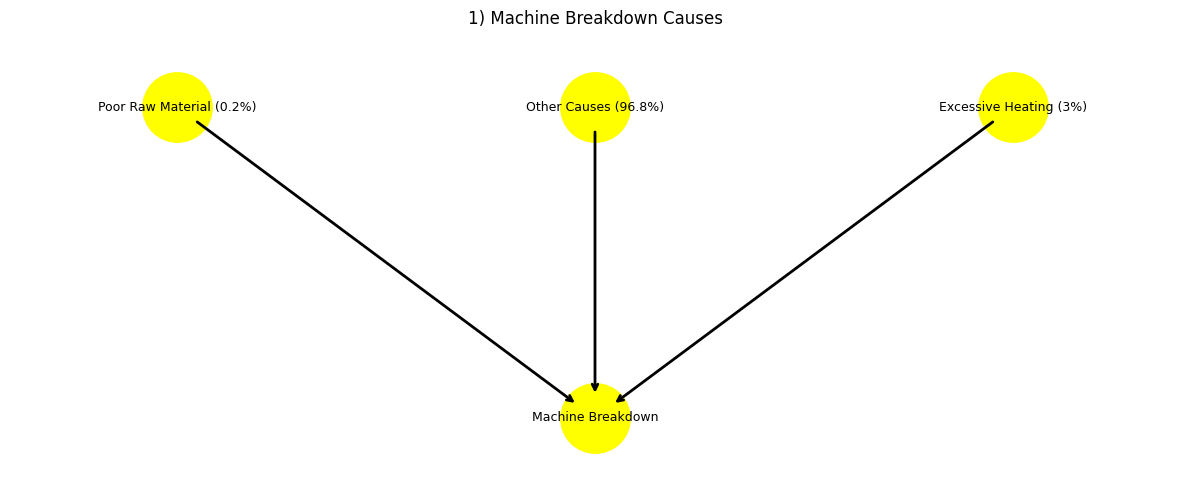

In [6]:
# Create a directed graph (Bayesian network)
G = nx.DiGraph()

# Add nodes
nodes = [
    "Poor Raw Material (0.2%)",
    "Excessive Heating (3%)",
    "Other Causes (96.8%)",
    "Machine Breakdown"
]
G.add_nodes_from(nodes)

# Add edges for the Bayesian network structure
edges = [
    ("Poor Raw Material (0.2%)", "Machine Breakdown"),
    ("Excessive Heating (3%)", "Machine Breakdown"),
    ("Other Causes (96.8%)", "Machine Breakdown")
]
G.add_edges_from(edges)

# Plot setup
plt.figure(figsize=(12, 5)) # Adjusted figsize for better layout
pos = {
    "Poor Raw Material (0.2%)": (-1.5, 0),
    "Other Causes (96.8%)": (0, 0),
    "Excessive Heating (3%)": (1.5, 0),
    "Machine Breakdown": (0, -1)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="yellow") # Increased node_size slightly
nx.draw_networkx_labels(G, pos, font_size=9) # Adjusted font_size for clarity

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=18, shrinkB=18), # Adjusted shrink values
    )

# Title and layout adjustments
plt.title("1) Machine Breakdown Causes", pad=15)
plt.margins(0.2)
plt.axis('off')
plt.tight_layout()
plt.show()


## Exercise 3.3

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


Data shape: (10000, 10)
   Virus A Virus B Disease 1 Disease 2  Symptom    Sign     X-ray Ecography  \
0   absent  absent    absent    absent   absent  absent  negative  negative   
1   absent  absent    absent    absent   absent  absent  negative  negative   
2  present  absent   present    absent  present  absent  negative  negative   
3   absent  absent    absent    absent   absent  absent  negative  negative   
4   absent  absent    absent    absent   absent  absent  negative  negative   

  Vaccination Anomaly  
0         yes  absent  
1         yes  absent  
2          no  absent  
3         yes  absent  
4          no  absent  


  0%|          | 11/1000000 [00:00<5:41:37, 48.79it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}



Hill-Climbing: learned edges
Virus A -> Virus B
Disease 1 -> Virus A
Disease 1 -> Sign
Disease 1 -> Virus B
Disease 2 -> Anomaly
Disease 2 -> Disease 1
Disease 2 -> Vaccination
Symptom -> Disease 1
Symptom -> Disease 2
Anomaly -> X-ray
Anomaly -> Ecography


Working for n conditional variables: 1:  20%|██        | 1/5 [00:04<00:19,  4.77s/it]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0     → 0 edges


Working for n conditional variables: 4:  80%|████████  | 4/5 [00:00<00:00, 20.16it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.001 → 10 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00, 27.00it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.01  → 11 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00, 25.91it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.1   → 11 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00, 16.38it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.5   → 11 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00, 13.13it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.7   → 12 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00,  9.22it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.9   → 18 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Virus A': 'C', 'Virus B': 'C', 'Disease 1': 'C', 'Disease 2': 'C', 'Symptom': 'C', 'Sign': 'C', 'X-ray': 'C', 'Ecography': 'C', 'Vaccination': 'C', 'Anomaly': 'C'}


α = 0.99  → 18 edges


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

α = 1     → 18 edges


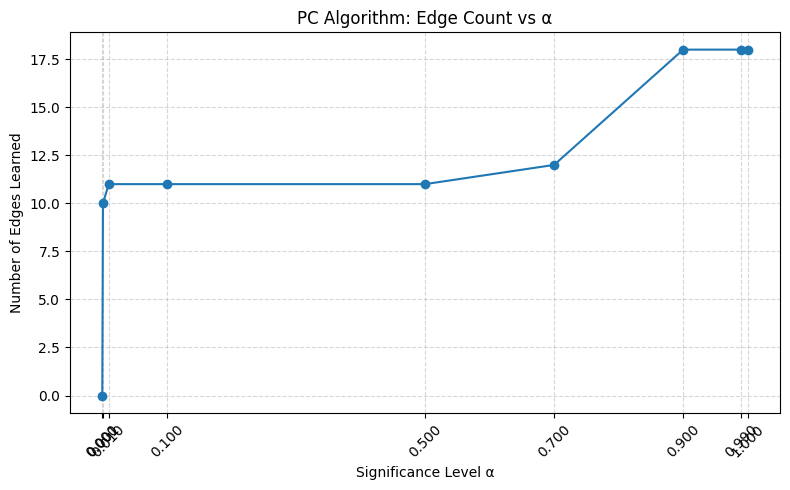

In [12]:
# 1. Load the data
excel_file = r'..\open_markov\03_generated_data.csv'
data = pd.read_csv(excel_file)

print("Data shape:", data.shape)
print(data.head())

# 2. Hill-Climbing Structure Learning
hc = HillClimbSearch(data)                           # no scoring_method here
best_model = hc.estimate(scoring_method=BIC(data))    # score passed to estimate :contentReference[oaicite:4]{index=4}

print("\nHill-Climbing: learned edges")
for u, v in best_model.edges():
    print(f"{u} -> {v}")

# 3. PC Algorithm over multiple α levels
alphas = [0, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 0.99, 1]
edge_counts = []

for alpha in alphas:
    pc = PC(data)                                     # just DataFrame in constructor :contentReference[oaicite:5]{index=5}
    try:
        model_pc = pc.estimate(significance_level=alpha)
        n_edges = len(model_pc.edges())
    except Exception as e:
        print(f"PC failed at α={alpha}: {e}")
        n_edges = 0

    edge_counts.append(n_edges)
    print(f"α = {alpha:<5} → {n_edges} edges")

# 4. Plot edges vs α
plt.figure(figsize=(8, 5))
plt.plot(alphas, edge_counts, marker='o')
plt.xlabel('Significance Level α')
plt.ylabel('Number of Edges Learned')
plt.title('PC Algorithm: Edge Count vs α')
plt.xticks(alphas, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
